In [2]:
import pandas as pd
police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')

In [3]:
police_killings.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312


In [5]:
police_killings.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [6]:
police_killings.shape

(467, 34)

In [7]:
# Checking how many people of each race were killed
police_killings['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64

In [9]:
%matplotlib inline

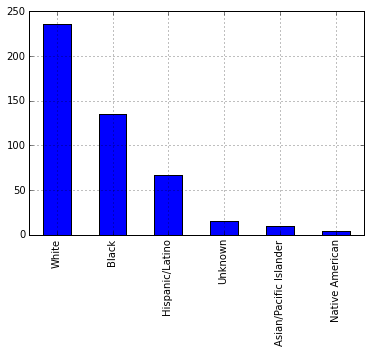

In [11]:
police_killings['raceethnicity'].value_counts().plot(kind='bar')

# The majority of killings are white, but that would be expected, since the population of that US is majority white. What would be more interesting is whether the percentage of killings for each race matches up with the percentage of the population for that race.

In [12]:
killings_perc_df = pd.DataFrame(police_killings['raceethnicity'].value_counts())

In [14]:
killings_perc_df[0]

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: 0, dtype: int64

In [17]:
killings_perc_df = killings_perc_df.rename(columns={0:'totals'})

In [21]:
killings_perc_df['Proportion (%)'] = 100 * killings_perc_df['totals'] / killings_perc_df['totals'].sum()

In [22]:
killings_perc_df

,totals,Proportion (%)
White,236,50.535332
Black,135,28.907923
Hispanic/Latino,67,14.346895
Unknown,15,3.211991
Asian/Pacific Islander,10,2.141328
Native American,4,0.856531


In [23]:
us_race_demographics = [61.6, 13.3, 16.3, 1.8, 5.8, 1.2]

In [24]:
killings_perc_df['US Demographics (%)'] = us_race_demographics

In [25]:
killings_perc_df

,totals,Proportion (%),US Demographics (%)
White,236,50.535332,61.6
Black,135,28.907923,13.3
Hispanic/Latino,67,14.346895,16.3
Unknown,15,3.211991,1.8
Asian/Pacific Islander,10,2.141328,5.8
Native American,4,0.856531,1.2


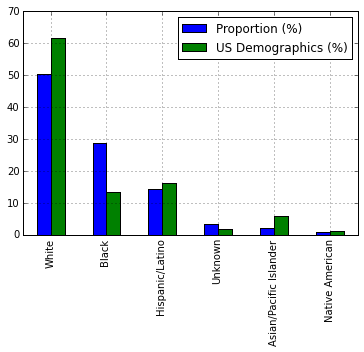

In [26]:
killings_perc_df[['Proportion (%)', 'US Demographics (%)']].plot(kind='bar')

# This picture is different. Clearly blacks are getting killed at a much higher rate than their proportion of US population (almost twice)

In [34]:
import numpy as np
police_killings['p_income'].value_counts()

22969    3
16415    2
15373    2
17632    2
16558    2
14256    2
37476    2
31009    2
19921    2
23243    2
-        2
16953    2
28125    2
21130    2
18363    1
...
15656    1
32211    1
20995    1
22734    1
17223    1
24749    1
22255    1
11656    1
32142    1
51071    1
17696    1
22947    1
18978    1
25865    1
15488    1
Length: 452, dtype: int64

Seems like there is a non-numeric value "-"

In [38]:
# Let's make a new column
police_killings['income'] = police_killings[police_killings['p_income'] != '-']['p_income'].astype(float)

Let's see the distribution of income

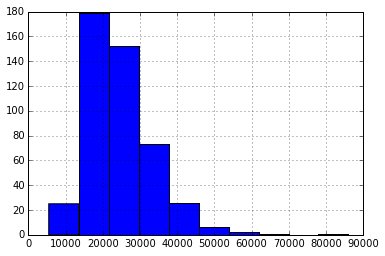

In [40]:
police_killings['income'].hist()

This looks like the median income is around 20-30K, which suggests most killings in this database occur in poorer areas. Median houshold income in the US was around 56K in 2015

Next, let's look at breakdowns of shootings by region

In [41]:
police_killings['state_fp']

0      1
1     22
2     55
3      6
4     39
5      4
6      6
7      6
8     48
9     26
10     6
11     6
12    48
13    18
14    18
...
452    48
453    48
454     6
455    36
456    51
457    45
458    48
459    48
460     1
461    34
462    51
463    53
464    37
465     6
466     6
Name: state_fp, Length: 467, dtype: int64

In [42]:
# Get population by state from the Census bureau
state_pop = pd.read_csv('state_population.csv')

In [44]:
# Count of killings by state
counts = police_killings['state_fp'].value_counts()

In [45]:
# Merge the two
states = pd.DataFrame({'STATE': counts.index, 'shootings': counts})

In [46]:
states = states.merge(state_pop, on='STATE')

In [47]:
states.head(4)

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2


In [50]:
# Get population in millions
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000

In [51]:
states['pop_millions'].head(10)

0    39.144818
1    27.469114
2    20.271272
3     6.828065
4     3.911338
5    10.214860
6    19.795791
7     5.456574
8     8.958013
9     7.170351
Name: pop_millions, dtype: float64

In [52]:
# Get rate of shootings by population
states['rate'] = states['shootings'] / states['pop_millions']

In [58]:
states[['NAME', 'rate']].sort('rate', ascending=False)

,NAME,rate
4,Oklahoma,5.624674
3,Arizona,3.661359
27,Nebraska,3.164240
34,Hawaii,2.794071
39,Alaska,2.708442
33,Idaho,2.417021
32,New Mexico,2.397956
10,Louisiana,2.355095
7,Colorado,2.199182
41,Delaware,2.114312


The state with the highest rate of shootings per population by far is Oklahoma, the lowest rate belongs to Connecticut. 

In general, affluent states seem to have lower shooting rate than poor ones.

In [84]:
pk = police_killings[(police_killings['share_white'] != '-') \
                     & (police_killings['share_black'] != '-') \
                    & (police_killings['share_hispanic'] != '-')]

In [87]:
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)

/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the doc

In [66]:
# 10 states with the lowest shooting rate
lowest_10_states = states.sort('rate')[0:10]['STATE'].tolist()

In [88]:
# polics killing in those 10 states
lowest_10_states_killings = pk[pk['state_fp'].isin(lowest_10_states)]

In [93]:
# get some stats on these columns
interesting_columns = [
    'pop', 
    'county_income', 
    'share_white', 
    'share_black', 
    'share_hispanic']

lowest_10_states_killings[interesting_columns].describe()

,pop,county_income,share_white,share_black,share_hispanic
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,4153.472727,55037.963636,60.132727,21.610909,12.994545
std,1395.466029,12468.570173,32.653614,27.898976,15.433434
min,1271.000000,34388.000000,0.000000,0.000000,0.000000
25%,3236.500000,46578.500000,38.900000,2.150000,1.800000
50%,4079.000000,53119.000000,72.100000,9.300000,5.900000
75%,4923.500000,59206.000000,88.300000,27.450000,20.350000
max,8222.000000,87763.000000,97.200000,98.900000,71.900000


In [91]:
# 10 states with the highest shooting rate
highest_10_states = states.sort('rate', ascending=False)[0:10]['STATE'].tolist()

In [92]:
# polics killing in those 10 states
highest_10_states_killings = pk[pk['state_fp'].isin(highest_10_states)]

In [94]:
highest_10_states_killings[interesting_columns].describe()

,pop,county_income,share_white,share_black,share_hispanic
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,4315.750000,48706.967391,55.652174,11.532609,20.693478
std,2063.723609,9839.206872,24.406158,19.591303,20.415690
min,403.000000,25498.000000,2.100000,0.000000,0.000000
25%,2886.000000,42987.000000,39.175000,0.675000,4.350000
50%,4257.500000,48801.000000,58.200000,2.700000,10.850000
75%,5377.000000,53596.000000,74.200000,11.550000,31.725000
max,13561.000000,77454.000000,95.900000,93.100000,81.500000


We're actually looking at columns that contain county-level data for where the shooting occurred. So we're not actually doing a state by state comparison of the columns. This may bias the data, and change what we found.

Also, we filtered rows with '-' which might have biased the data